In [1]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
MKM1 = MKModel('Atomic_1.csv','Stoich_1.csv','Param_1.csv') #Defining the Model

Mass is conserved. 

Thermodynamically constrained (with pseudo Keq)


In [3]:
MKM1.Stoichiometric_numbers

array([[1. ],
       [0.5],
       [0.5],
       [1. ]])

In [4]:
MKM1.set_initial_coverages(init=[0,0,0,1]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM1.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM1.set_limits_of_integration(Ti=0,Tf=6e6)#Sets the reange of time used in integration

(0, 6000000.0)

In [5]:
MKM1.Keq

13003.600735533166

In [6]:
#Manual Keq calc
stc_numbers = MKM1.Stoichiometric_numbers
Keq_k = 1
kef = MKM1.k
kf = kef[0::2] #Pulling out the forward rxn rate constants (::2 means every other value, skip by a step of 2)
kr = kef[1::2] #Pulling out the reverse rxn rate constants (::2 means every other value, skip by a step of 2)

for i in np.arange(len(kf)):
            Keq_k = Keq_k * ((kf[i]/kr[i]) ** float(stc_numbers[i]))
        
print(Keq_k)

13003.600735533166


<IPython.core.display.Javascript object>


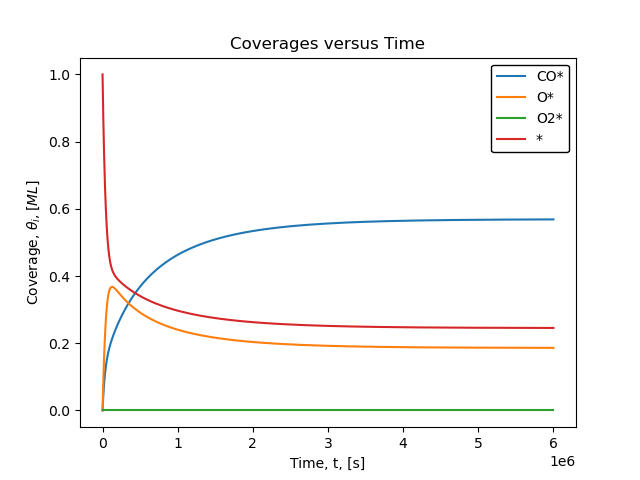

In [7]:
a, b = MKM1.solve_coverage(plot=True)

<IPython.core.display.Javascript object>


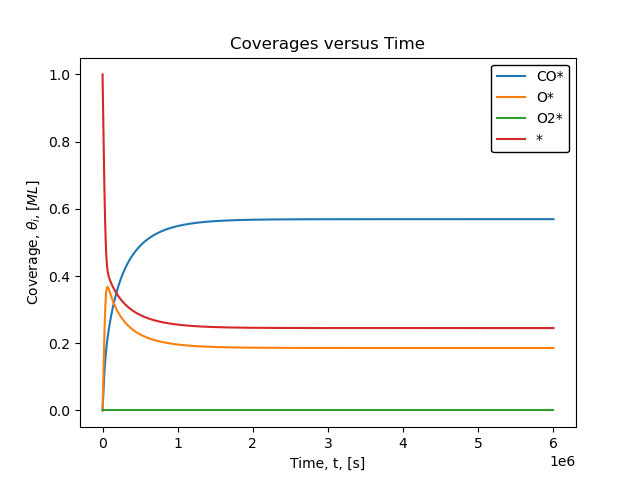

CPU times: user 1.03 s, sys: 12.4 ms, total: 1.04 s
Wall time: 1.05 s


In [8]:
%%time
MKM1.Coeff_extract(multipls=[1,2,1,0]) #Manually setting how much each surface species' Beta constants changes
MKM1.rate_const_correction='Forced_exp_CD' #Turning on option to implement global interaction term (Bragg-William)
solb1,soltb1 = MKM1.solve_coverage(plot=True) 

<IPython.core.display.Javascript object>


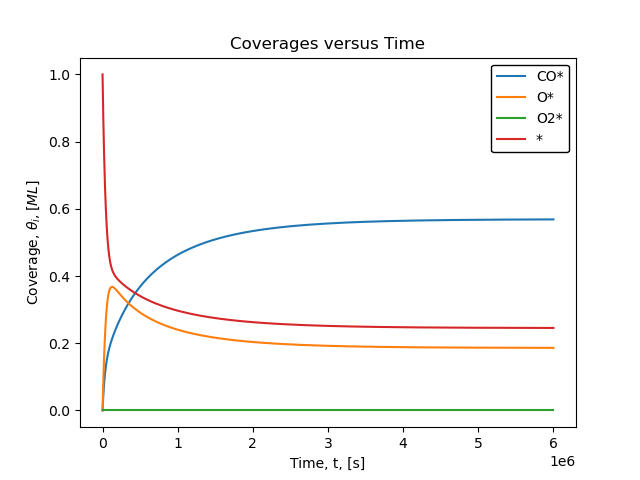

CPU times: user 811 ms, sys: 8.96 ms, total: 820 ms
Wall time: 813 ms


In [9]:
%%time
MKM1.rate_const_correction='None'
solb1,soltb1 = MKM1.solve_coverage(plot=True) 

In [10]:
MKM1.periodic_operation_two_states?

In [11]:
MKM1.rate_const_correction='None'


Periodic Simulation of coverages 

|    | 0   |   State 1,P[bar] |   State 2,P[bar] |
|---:|:----|-----------------:|-----------------:|
|  0 | CO  |            2e-10 |            8e-06 |
|  1 | O2  |            2e-06 |            2e-06 |
|  2 | CO2 |            1e-08 |            1e-08 |

Time in State 1: 2.000000e+06 s
Time in State 2: 2.000000e+06 s

Number of Cycles: 2.5
Total Elapsed Reaction Time: 10000000.0 



<IPython.core.display.Javascript object>


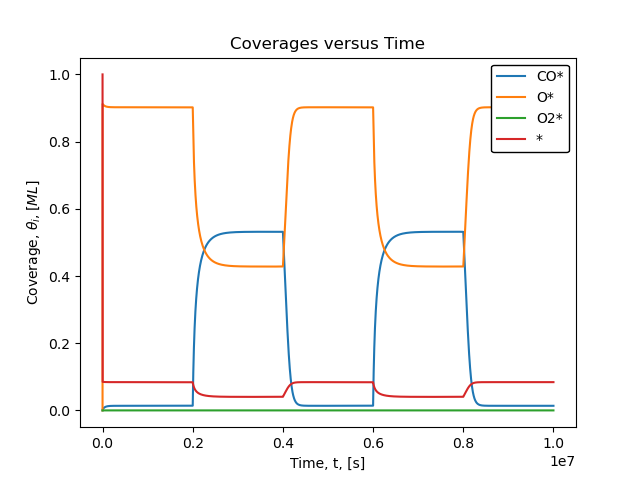

CPU times: user 8.69 s, sys: 35.4 ms, total: 8.73 s
Wall time: 8.74 s


In [12]:
%%time
MKM1.rate_const_correction='Forced_exp_CD'
MKM1.Coeff_extract(multipls=[1,2,1,2])

solb1,soltb1 = MKM1.periodic_operation_two_states(
    State1=[0.2e-9,2e-6,1e-8],State2=[0.8e-5,2e-6,1e-8],t1=2e6,t2=2e6,total_time=10e6,label='coverages',Initial_Covg=[0,0,0,1],plot=True) 

### Dynamic Pressure Modulation

In [13]:
MKM1.rate_const_correction='None'


Periodic Simulation of coverages 

|    | 0   |   State 1,P[bar] |   State 2,P[bar] |
|---:|:----|-----------------:|-----------------:|
|  0 | CO  |            2e-10 |            8e-06 |
|  1 | O2  |            2e-06 |            2e-06 |
|  2 | CO2 |            1e-08 |            1e-08 |

Time in State 1: 2.000000e+06 s
Time in State 2: 5.000000e+06 s

Number of Cycles: 1.4285714285714286
Total Elapsed Reaction Time: 10000000.0 



<IPython.core.display.Javascript object>


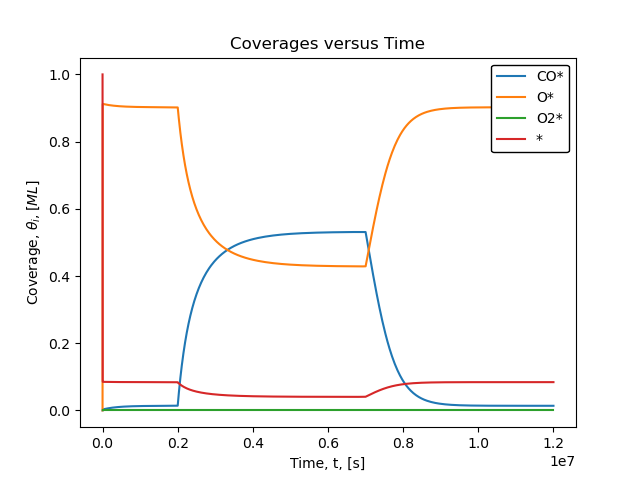

CPU times: user 4.44 s, sys: 25.1 ms, total: 4.46 s
Wall time: 4.47 s


In [14]:
%%time
solb1,soltb1 = MKM1.periodic_operation_two_states(
    State1=[0.2e-9,2e-6,1e-8],State2=[0.8e-5,2e-6,1e-8],t1=2e6,t2=5e6,total_time=10e6,label='coverages',Initial_Covg=[0,0,0,1],plot=True) 

In [15]:
MKM1.Keq

13003.600735533166


Periodic Simulation of Rates of production 

|    | 0   |   State 1,P[bar] |   State 2,P[bar] |
|---:|:----|-----------------:|-----------------:|
|  0 | CO  |            2e-10 |            8e-06 |
|  1 | O2  |            2e-06 |            2e-06 |
|  2 | CO2 |            1e-08 |            1e-08 |

Time in State 1: 2.000000e+06 s
Time in State 2: 2.000000e+06 s

Number of Cycles: 2.5
Total Elapsed Reaction Time: 10000000.0 



<IPython.core.display.Javascript object>


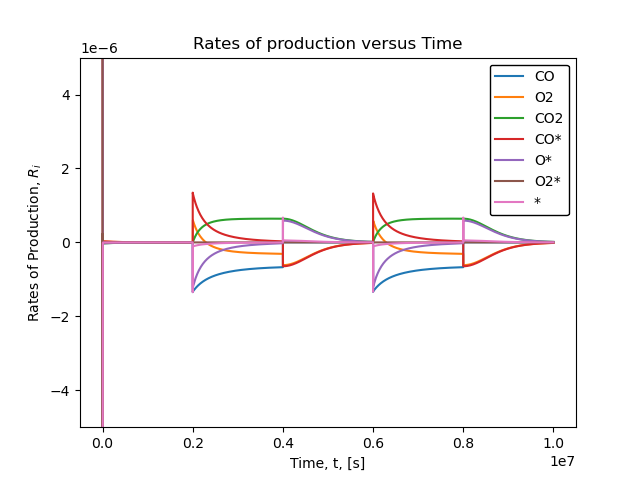

CPU times: user 7.11 s, sys: 24.3 ms, total: 7.14 s
Wall time: 7.15 s


(-5e-06, 5e-06)

In [16]:
%%time
solb1,soltb1 = MKM1.periodic_operation_two_states(
    State1=[0.2e-9,2e-6,1e-8],State2=[0.8e-5,2e-6,1e-8],t1=2e6,t2=2e6,total_time=10e6,label='rates_p',Initial_Covg=[0,0,0,1],plot=True) 

plt.ylim([-5e-6,5e-6])


Periodic Simulation of Rates of reaction 

|    | 0   |   State 1,P[bar] |   State 2,P[bar] |
|---:|:----|-----------------:|-----------------:|
|  0 | CO  |            2e-10 |            8e-06 |
|  1 | O2  |            2e-06 |            2e-06 |
|  2 | CO2 |            1e-08 |            1e-08 |

Time in State 1: 2.000000e+06 s
Time in State 2: 2.000000e+06 s

Number of Cycles: 2.5
Total Elapsed Reaction Time: 10000000.0 



<IPython.core.display.Javascript object>


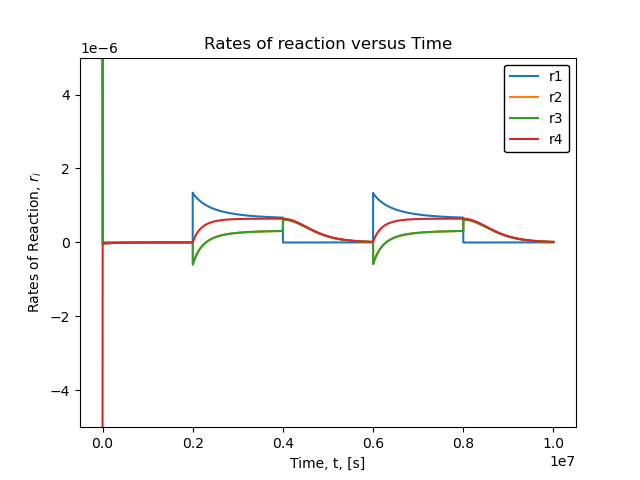

CPU times: user 6.7 s, sys: 20.4 ms, total: 6.72 s
Wall time: 6.72 s


(-5e-06, 5e-06)

In [17]:
%%time
solb1,soltb1 = MKM1.periodic_operation_two_states(
    State1=[0.2e-9,2e-6,1e-8],State2=[0.8e-5,2e-6,1e-8],t1=2e6,t2=2e6,total_time=10e6,label='rates_r',Initial_Covg=[0,0,0,1],plot=True) 

plt.ylim([-5e-6,5e-6])


Periodic Simulation of Rates of production 

|    | 0   |   State 1,P[bar] |   State 2,P[bar] |
|---:|:----|-----------------:|-----------------:|
|  0 | CO  |            2e-10 |            8e-06 |
|  1 | O2  |            2e-06 |            2e-06 |
|  2 | CO2 |            1e-08 |            1e-08 |

Time in State 1: 5.000000e+06 s
Time in State 2: 2.000000e+06 s

Number of Cycles: 8.0
Total Elapsed Reaction Time: 56000000.0 



<IPython.core.display.Javascript object>


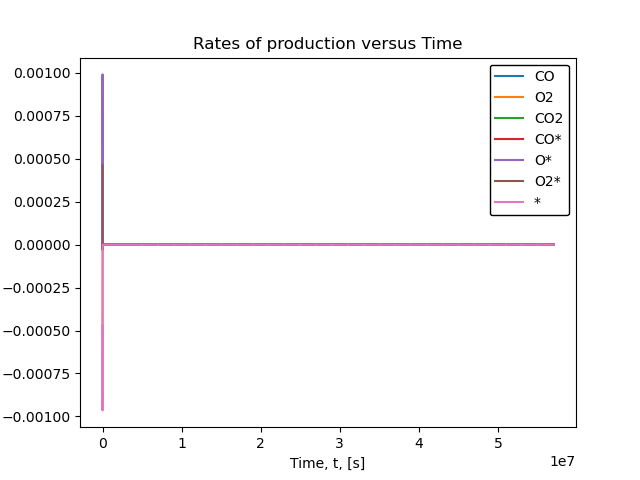

CPU times: user 35.3 s, sys: 129 ms, total: 35.5 s
Wall time: 35.5 s


In [18]:
%%time
solb1,soltb1 = MKM1.periodic_operation_two_states(
    State1=[0.2e-9,2e-6,1e-8],State2=[0.8e-5,2e-6,1e-8],t1=5e6,t2=2e6,n_cycles=8,label='rates_p',Initial_Covg=[0,0,0,1],plot=True) 

# OOOOOOO

# OOOOOOO

# OOOOOOO

In [19]:
s = np.array([1344,56])
# np.format_float_scientific(s, unique=False, precision=15)
# '1.230000071797338e+24

# [].append(i) for i in range(5)

[np.format_float_scientific(i, exp_digits=4) for i in s]

# [i for i in range(5)]

['1.344e+0003', '5.6e+0001']

Other possible features that weren't used (but also work) include:
- dynamic_transient_rates_reaction(State1=[],State2=[],plot=False)
- dynamic_transient_rates_production(State1=[],State2=[],plot=False)

### Cyclic_Dynamic Pressure Modulation


Periodic Simulation of coverages 

|    | 0   |   State 1,P[bar] |   State 2,P[bar] |
|---:|:----|-----------------:|-----------------:|
|  0 | CO  |            2e-10 |            8e-06 |
|  1 | O2  |            2e-06 |            2e-06 |
|  2 | CO2 |            1e-08 |            1e-08 |

Time in State 1: 2.000000e+06 s
Time in State 2: 2.000000e+06 s

Number of Cycles: 15.0
Total Elapsed Reaction Time: 60000000.0 



<IPython.core.display.Javascript object>


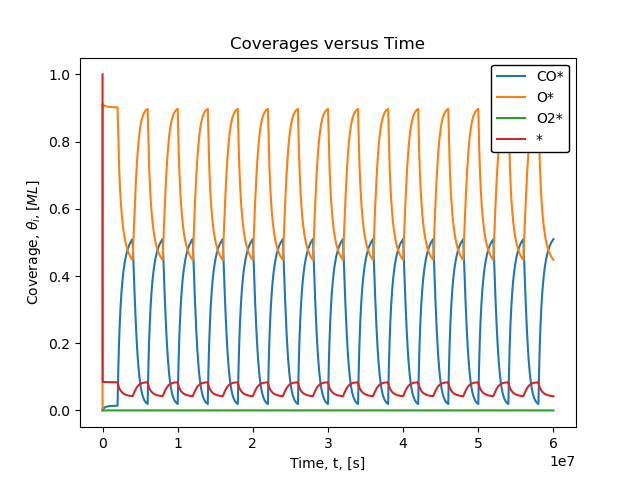

In [22]:
MKM1.set_initial_coverages(init=[0,0,0,1])
MKM1.set_rxnconditions() 
MKM1.set_limits_of_integration(Ti=0,Tf=6e6)

solc1,soltc1 = MKM1.periodic_operation_two_states(
    State1=[0.2e-9,2e-6,1e-8],State2=[0.8e-5,2e-6,1e-8],t1=2e6,t2=2e6,total_time=60e6,plot=True) 

### Finding Limit Cycle


Periodic Simulation of coverages 

|    | 0   |   State 1,P[bar] |   State 2,P[bar] |
|---:|:----|-----------------:|-----------------:|
|  0 | CO  |            2e-10 |            8e-06 |
|  1 | O2  |            2e-06 |            2e-06 |
|  2 | CO2 |            1e-08 |            1e-08 |

Time in State 1: 2.000000e+06 s
Time in State 2: 6.000000e+06 s

Number of Cycles: 62.5
Total Elapsed Reaction Time: 500000000.0 



<IPython.core.display.Javascript object>


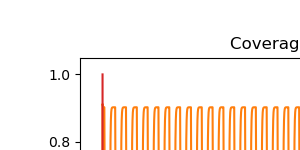

CPU times: user 2min 3s, sys: 469 ms, total: 2min 3s
Wall time: 2min 4s


In [23]:
%%time
#Re-initializing 
MKM1.set_initial_coverages(init=[0,0,0,1]) #Sets the initial coverages of all the surface species 
MKM1.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM1.set_limits_of_integration(Ti=0,Tf=6e6)#Sets the reange of time used in integration

solc1i,soltc1i = MKM1.periodic_operation_two_states(State1=[0.2e-9,2e-6,1e-8],State2=[0.8e-5,2e-6,1e-8],t1=2e6,t2=6e6,total_time=500e6,plot=True) #Calculate the transient response from State 1 to State 2. State conditions (Pressures) can be entered as seen in this line, or if not entered, a prompt will appear asking for the relevant state conditions


Periodic Simulation of coverages 

|    | 0   |   State 1,P[bar] |   State 2,P[bar] |
|---:|:----|-----------------:|-----------------:|
|  0 | CO  |            2e-10 |            8e-06 |
|  1 | O2  |            2e-06 |            2e-06 |
|  2 | CO2 |            1e-08 |            1e-08 |

Time in State 1: 2.000000e+06 s
Time in State 2: 6.000000e+06 s

Number of Cycles: 2.5
Total Elapsed Reaction Time: 20000000.0 



<IPython.core.display.Javascript object>


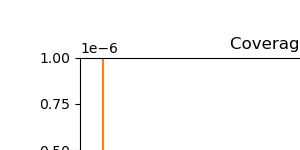

(-1e-06, 1e-06)

In [24]:
MKM1.set_initial_coverages(init=[0,0,0,1])
MKM1.set_rxnconditions()
MKM1.set_limits_of_integration(Ti=0,Tf=6e6)

sold1,soltd1 = MKM1.periodic_operation_two_states(
    State1=[0.2e-9,2e-6,1e-8],State2=[0.8e-5,2e-6,1e-8],t1=2e6,t2=6e6,total_time=20e6,plot=True)
plt.ylim([-1e-6,1e-6])

In [25]:
XR_C_vals_1 = MKM1.get_X_RC_SS(p_inc=0.01)
XR_C_vals_1

Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached


[mpf('-0.11607507711757736070768649519433693577263560886300475'),
 mpf('0.0018722338714425020978029875920850036694040770133969424'),
 mpf('0.0000087204196110232802120978638839237625721418965824861244'),
 mpf('1.0924736250994053118451093796818041386362795610537724')]

# ----------------------------------------------------------------------------------------

## Model 2

***
$\mathbf{\text{Micro Kinetic Model for (a 7 step Redox Mechanism) Water Gas Shift Reaction}}:$<br>
#### [Link to Relevant Paper](https://www.mdpi.com/2673-4583/2/1/11) 
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + H_{2}O {\stackrel{\tiny{\textrm{Ni/CeO_2}}}{\rightleftharpoons}} CO_2 + H_2$$
$Ea = -41kJ{mol}^{-1}$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of $CO$ / Desorption of ${CO}^{*}$

$$ {CO}(g) + * \rightleftharpoons {CO}^{*} $$  <br> 


Reaction 2:&emsp;Adsorption of $H_{2}O$ / Desorption of ${H_{2}O}^{*}$

$$ {H_{2}O}(g) + * \rightleftharpoons {H_{2}O}^{*} $$  <br> 


Reaction 3:&emsp;Dissociation of ${H_{2}O}^*$ / Surface Reaction of ${OH}^{*}$ and $H^*$

$$ {H_{2}O}^* + * \rightleftharpoons {OH}^{*} + H^* $$  <br>


Reaction 4:&emsp;Surface Reaction of ${CO}^{*}$ and ${OH}^*$ / Dissociation of ${COOH}^*$ (1)

$$ {CO}^* + {OH}^* \rightleftharpoons {COOH}^{*} + * $$  <br> 


Reaction 5:&emsp;Dissociation of ${COOH}^*$ (2) / Surface Reaction of ${CO_2}^{*}$ and ${H}^*$

$$ {COOH}^* + * \rightleftharpoons {CO_2}^* + {H}^* $$  <br> 


Reaction 6:&emsp;Desorption of $2H^*$ / Adsorption of $H_2$

$$ 2H^{*} \rightleftharpoons {H_2}(g) + 2^* $$  <br> 


Reaction 7:&emsp;Desorption of ${CO_2}^*$ / Adsorption of ${CO}_2$   

$$ {{CO}_2}^{*} \rightleftharpoons {CO_2}(g) + * $$  <br> 

***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. ${H_2}O$
3. $CO_2$
4. $H_2$
5. ${CO}^*$
6. ${{H_2}O}^*$
7. $H^*$
8. ${OH}^*$
9. ${COOH}^*$
10. ${CO_2}^*$
11. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO  &  {H_2}O &   CO_2  &  H_2  &  {CO}^* & {H_2}O^* &   H^* & {OH}^* & {COOH}^* & {CO_2}^* & *\\
H   &   0   &  2      &   0     &  2    &   0     &   2      &   1   &   1    &    1     &    0     & 0\\
C   &   1   &  0      &   1     &  0    &   1     &   0      &   0   &   0    &    1     &    1     & 0\\
O   &   1   &  1      &   2     &  0    &   1     &   1      &   0   &   1    &    2     &    2     & 0\\
*   &   0   &  0      &   0     &  0    &   1     &   1      &   1   &   1    &    1     &    1     & 1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x11)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    &P_{CO}&P_{{H_2}O}& P_{CO_2}&P_{H_2}&\theta_{CO}&\theta_{{H_2}O}&\theta_{H}&\theta_{OH}&\theta_{COOH}&\theta_{{CO}_2}&\theta_*\\
r1  &  -1   &  0       &   0     &  0    &   1       &   0           &   0      &   0    &    0     &    0     &-1\\
r2  &   0   & -1       &   0     &  0    &   0       &   1           &   0      &   0    &    0     &    0     &-1\\
r3  &   0   &  0       &   0     &  0    &   0       &  -1           &   1      &   1    &    0     &    0     &-1\\
r4  &   0   &  0       &   0     &  0    &  -1       &   0           &   0      &  -1    &    1     &    0     & 1\\
r5  &   0   &  0       &   0     &  0    &   0       &   0           &   1      &   0    &   -1     &    1     &-1\\
r6  &   0   &  0       &   0     &  1    &   0       &   0           &  -2      &   0    &    0     &    0     & 2\\
r7  &   0   &  0       &   1     &  0    &   0       &   0           &   0      &   0    &    0     &   -1     & 1\end{bmatrix}  
\
\end{equation}

Stoichiometric Matrix Size : (7x11)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{A_{i,j}} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{A_{i,j}}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{{H_2}O} \cdot \theta_{*} - k_{2}^r \cdot \theta_{{H_2}O} $$

$$r_3 = k_{3}^f \cdot \theta_{{H_2}O} \cdot \theta_{*} - k_{3}^r \cdot \theta_{OH} \cdot \theta_{H}$$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{OH} - k_{4}^r \cdot \theta_{COOH} \cdot \theta_{*} $$

$$r_5 = k_{5}^f \cdot \theta_{COOH} \cdot \theta_{*} - k_{5}^r \cdot \theta_{{CO}_2} \cdot \theta_{H}$$

$$r_6 = k_{6}^f \cdot \theta_{H}^2   - k_{6}^r \cdot \textrm{P}_{H_2} \cdot \theta_{*}^2 $$

$$r_7 = k_{7}^f \cdot \theta_{{CO}_2}  - k_{7}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}$$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{{H_2}O}} = \frac{d\theta_{{H_2}O}}{dt} = r_2 - r_3 $$

$$R_{\theta_{H}} = \frac{d\theta_{H}}{dt} = r_3 + r_5 - 2 r_6 $$

$$R_{\theta_{OH}} = \frac{d\theta_{OH}}{dt} = r_3 - r_4 $$

$$R_{\theta_{COOH}} = \frac{d\theta_{COOH}}{dt} = r_4 - r_5 $$

$$R_{\theta_{{CO}_2}} = \frac{d\theta_{{CO}_2}}{dt} = r_5 - r_7 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = r_7 + 2 r_6 + r_4 - r_6 - r_3 - r_2 - r_1 $$



In [26]:
MKM2 = MKModel('Atomic_2.csv','Stoich_2.csv','Param_2.csv')

Mass is conserved. 

Thermodynamically constrained (with pseudo Keq)


In [27]:
MKM2.Stoich

,r\S,P_CO,P_H2O,P_CO2,P_H2,theta_CO,theta_H2O,theta_H,theta_OH,theta_COOH,theta_CO2,theta_*
0,r1,-1,0,0,0,1,0,0,0,0,0,-1
1,r2,0,-1,0,0,0,1,0,0,0,0,-1
2,r3,0,0,0,0,0,-1,1,1,0,0,-1
3,r4,0,0,0,0,-1,0,0,-1,1,0,1
4,r5,0,0,0,0,0,0,1,0,-1,1,-1
5,r6,0,0,0,1,0,0,-2,0,0,0,2
6,r7,0,0,1,0,0,0,0,0,0,-1,1


In [28]:
MKM2.set_initial_coverages(init=[0.5,0.5,0,0,0,0,0])
MKM2.set_rxnconditions()
MKM2.set_limits_of_integration(Ti=0,Tf=4e-11)

(0, 4e-11)

<IPython.core.display.Javascript object>


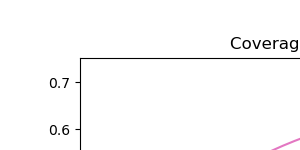

(array([[mpf('0.5'), mpf('0.5'), mpf('0.0'), ..., mpf('0.0'), mpf('0.0'),
         mpf('0.0')],
        [0.49999846754765104, 0.499999848715465, 1.1919977813176892e-10,
         ..., 4.2478456917552885e-17, 7.250365189800542e-20,
         1.6834984843839004e-06],
        [0.4999969350998843, 0.4999996972931758, 3.7619842583328595e-10,
         ..., 1.8317309540372117e-16, 2.288224712565847e-19,
         3.3668545429923922e-06],
        ...,
        [8.684195930239948e-05, 0.18944252556489374, 0.04641308828793774,
         ..., 9.182957722352952e-07, 3.814957840286321e-07,
         0.7106311321699997],
        [6.893021184310224e-05, 0.18540562651659812, 0.045877591347914776,
         ..., 7.020272915961112e-07, 2.9689311628959223e-07,
         0.7153950583846307],
        [6.383492715734161e-05, 0.18408455970719878, 0.045700461893601774,
         ..., 6.422051929549035e-07, 2.7320027077287237e-07,
         0.7169569836931309]], dtype=object),
 array([0.00000000e+00, 1.38683829e-17, 2.7

In [29]:
MKM2.solve_coverage(plot=True)

In [30]:
print(MKM2.get_SS_coverages()) #When using the inputed limit of integration, as seen above, the steady state was not reached

[6.383492715734161e-05 0.18408455970719878 0.045700461893601774
 0.053193244373432556 6.422051929549035e-07 2.7320027077287237e-07
 0.7169569836931309]


In [31]:
print(MKM2.get_SS_coverages(9e-10)) #Changing the tf (Final Time) from 4e11 to 9e-10, allowed for the steady state to be reached

Steady State Reached
[2.0321140307721186e-08 2.09014940374641e-06 1.7105512495602753e-06
 0.022024359408794734 1.6365672004618412e-12 2.2383913828369107e-09
 0.9779718173293703]


### Dynamic Pressure Modulation

In [32]:
MKM2.set_limits_of_integration(Ti=0,Tf=1.5e-10) #Need to change the limits of integration to view the plot of transient rates of production properly

(0, 1.5e-10)

In [33]:
solb2,soltb2 = MKM2.periodic_operation_two_states(State1=[0.2e-9,2e-6,1e-8,1e-8],State2=[0.8e-5,2e-6,1e-8,1e-8],plot=True)

Exception: t1, t2 must be inputted and either total_time or n_cycles should be inputed

In [ ]:
#Re-initializing initial conditions
MKM2.set_initial_coverages(init=[0.5,0.5,0,0,0,0,0])
MKM2.set_rxnconditions()
MKM2.set_limits_of_integration(Ti=0,Tf=4e-11)

sol4,solt4 = MKM2.periodic_operation_two_states(State1=[0.2e-9,2e-6,1e-8,1e-8],State2=[0.8e-5,2e-6,1e-8,1e-8],plot=True)

### Finding Limit Cycle

In [ ]:
%%time
#Re-initializing initial conditions
MKM2.set_initial_coverages(init=[0.5,0.5,0,0,0,0,0])
MKM2.set_rxnconditions()
MKM2.set_limits_of_integration(Ti=0,Tf=4e-11)

solc2i,soltc2i = MKM2.periodic_operation_two_states(State1=[0.2e-9,2e-6,1e-8,1e-8],State2=[0.8e-5,2e-6,1e-8,1e-8],t1=2e-11,t2=4e-11,total_time=500e-11,plot=True) #Calculate the transient response from State 1 to State 2. State conditions (Pressures) can be entered as seen in this line, or if not entered, a prompt will appear asking for the relevant state conditions

In [ ]:
#Re-initializing initial conditions
MKM2.set_initial_coverages(init=[0.5,0.5,0,0,0,0,0])
MKM2.set_rxnconditions()
MKM2.set_limits_of_integration(Ti=0,Tf=4e-11)

sold2,soltd2 = MKM2.periodic_operation_two_states(State1=[0.2e-9,2e-6,1e-8,1e-8],State2=[0.8e-5,2e-6,1e-8,1e-8],t1=2e-11,t2=4e-11,total_time=12e-11,plot=True) #Calculate the transient response from State 1 to State 2. State conditions (Pressures) can be entered as seen in this line, or if not entered, a prompt will appear asking for the relevant state conditions
plt.ylim([-1e-6,2e-6])

In [ ]:
XR_C_vals_2 = MKM2.get_X_RC_SS(p_inc=0.1, k_o_inp= MKM2.k)
XR_C_vals_2